In [1]:
import warnings
import wrangle
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
df = wrangle.wrangle_zillow()

Reading from local CSV...


In [3]:
train, test, validate = wrangle.train_test_validate_split(df)

train	 n = 1195240
test	 n = 426872
validate n = 512247


In [4]:
target = 'tax_value'
features = [col for col in df.columns if col != target]
quant_features = [feature for feature in features if df[feature].dtype != 'object']

In [5]:
x_train = train[features]
y_train = train[target]

x_validate = validate[features]
y_validate = validate[target]

x_test = test[features]
y_test = test[target]

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

MinMaxScaler()


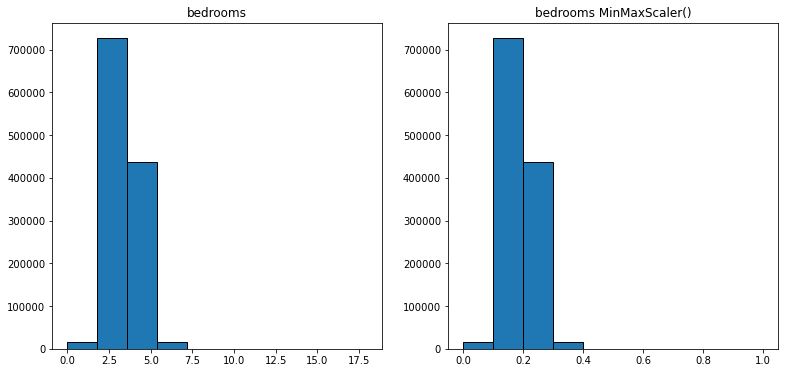

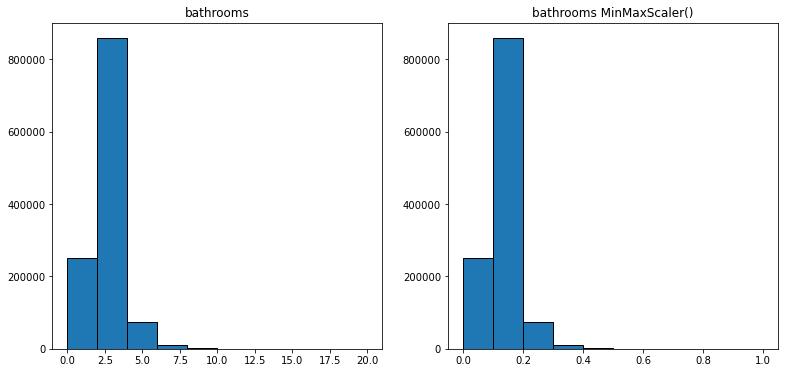

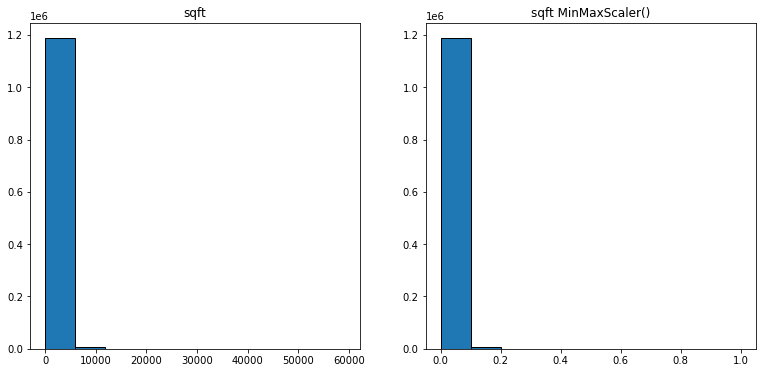

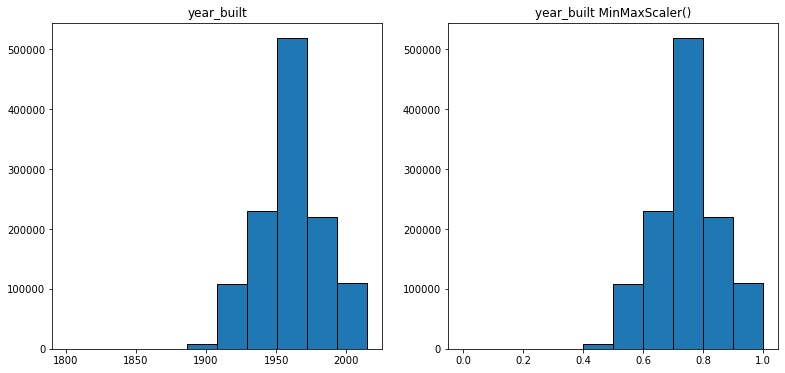

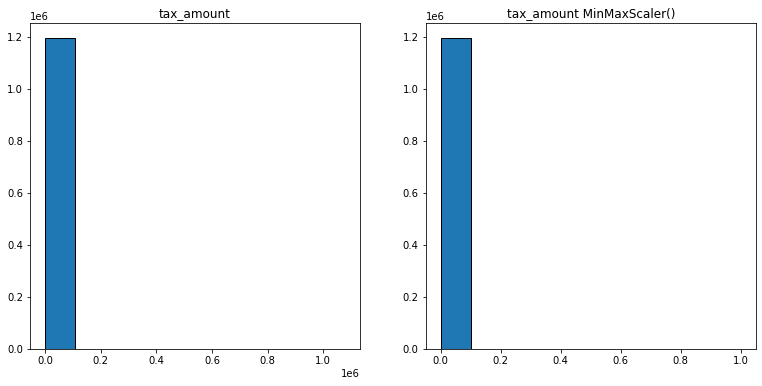

StandardScaler()


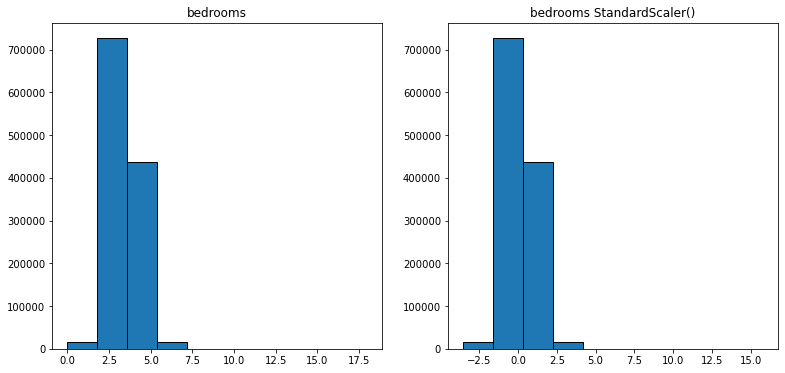

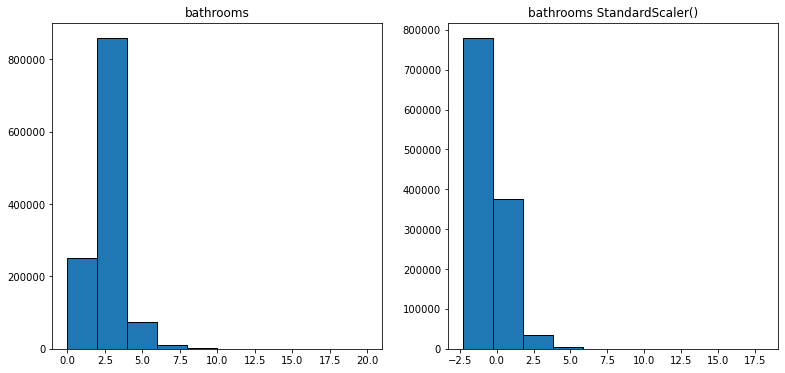

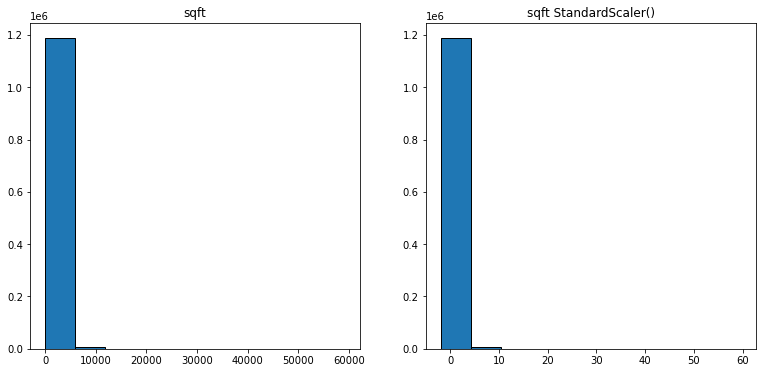

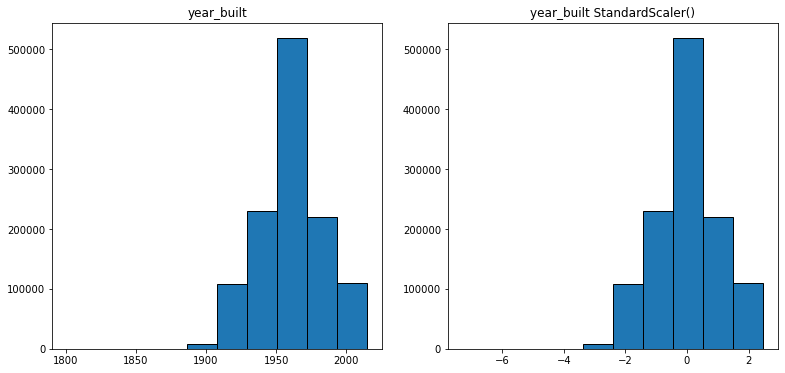

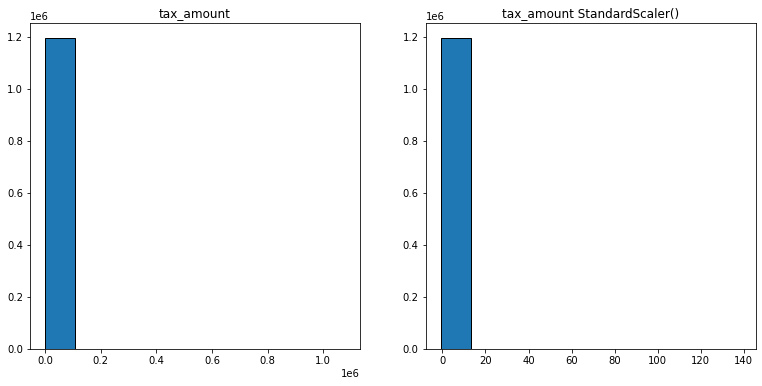

RobustScaler()


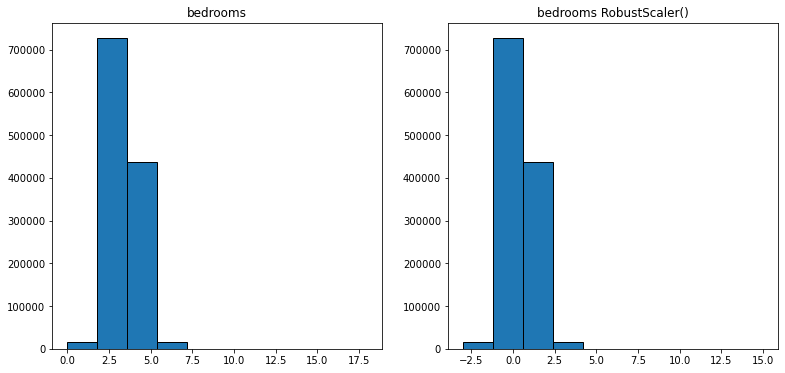

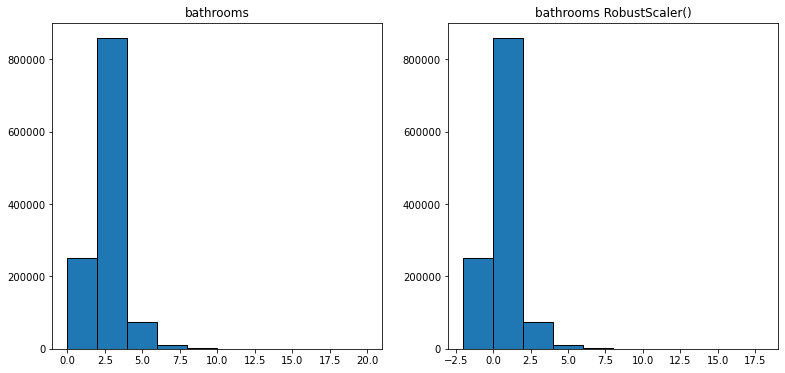

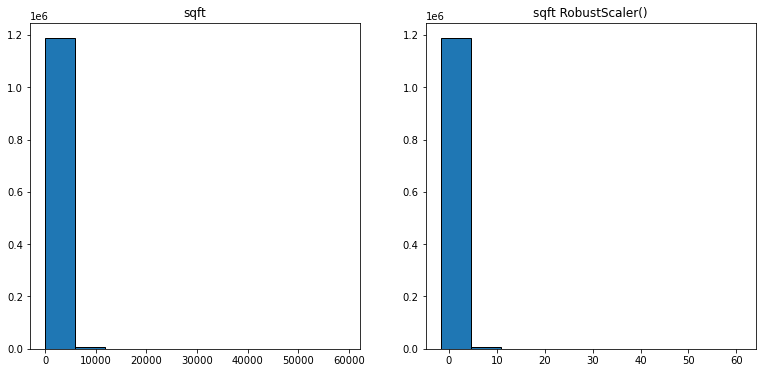

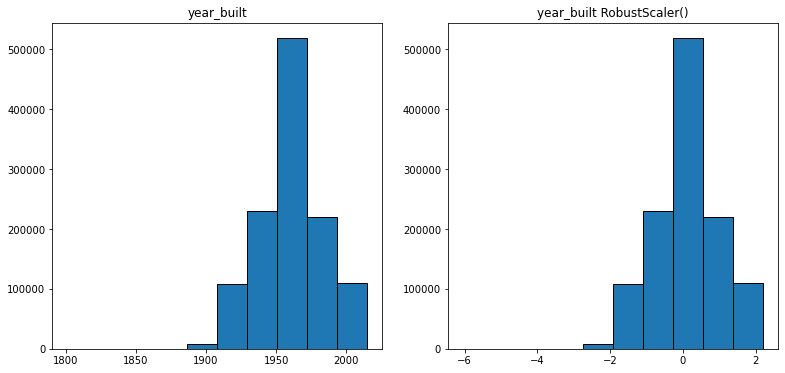

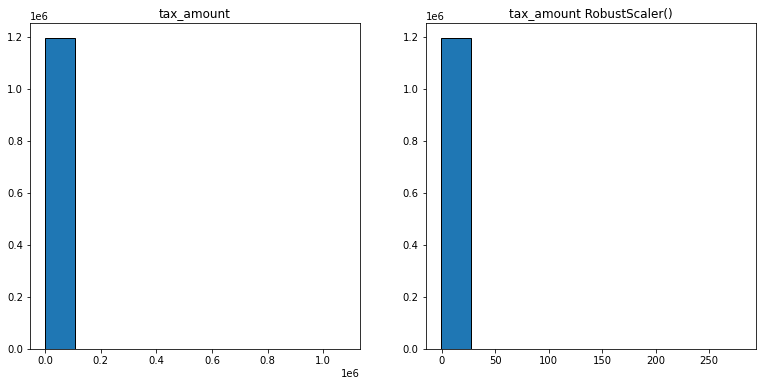

In [6]:
scaler_1 = MinMaxScaler()
scaler_2 = StandardScaler()
scaler_3 = RobustScaler()
scaler_list = [MinMaxScaler(), StandardScaler(), RobustScaler()]


for sclr in scaler_list:
    print('=' * 100)
    print(sclr)
    x_train_scaled = pd.DataFrame()
    x_validate_scaled = pd.DataFrame()
    x_test_scaled = pd.DataFrame()

    for feature in quant_features:

        scaler = sclr
        scaler.fit(x_train[[feature]])
        
        x_train_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
        x_validate_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
        x_test_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()

        plt.figure(figsize=(13, 6))
        
        plt.subplot(121)
        plt.hist(x_train[feature], ec='black')
        plt.title(feature)
        
        plt.subplot(122)
        plt.hist(x_train_scaled[feature], ec='black')
        plt.title(f'{feature} {sclr}')
        
        plt.show()

#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [7]:
for feature in quant_features:
    print((scaler.inverse_transform(x_train_scaled[[feature]]) == x_train[[feature]]).all())

bedrooms    False
dtype: bool
bathrooms    False
dtype: bool
sqft    False
dtype: bool
year_built    False
dtype: bool
tax_amount    False
dtype: bool


If the dataset were the exact same, the above boolean values would all be true, since they represent whether each and every value in the original train dataset is the same as its corresponding value in the inverse scaled dataset.

#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

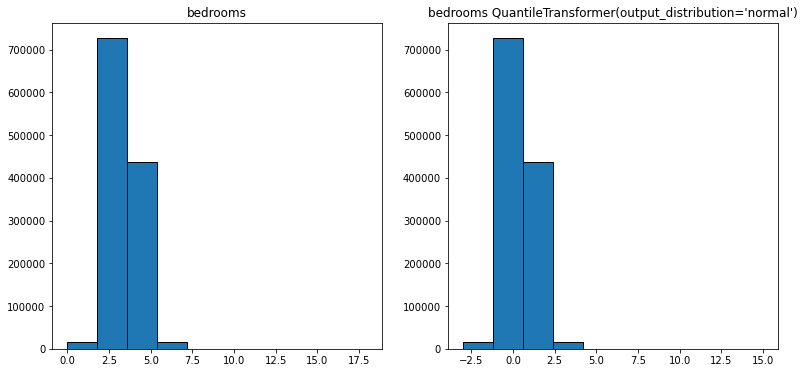

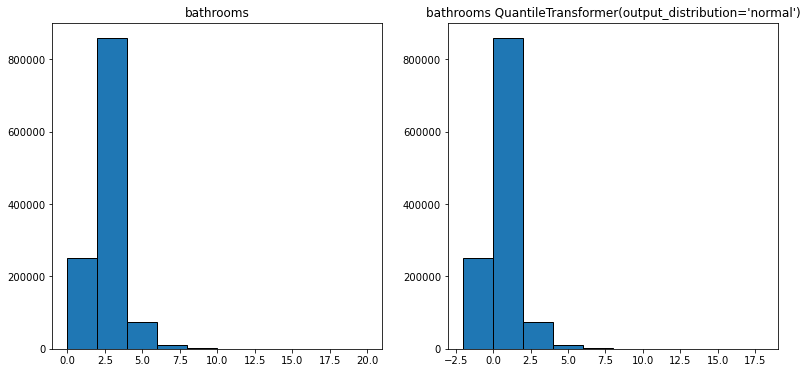

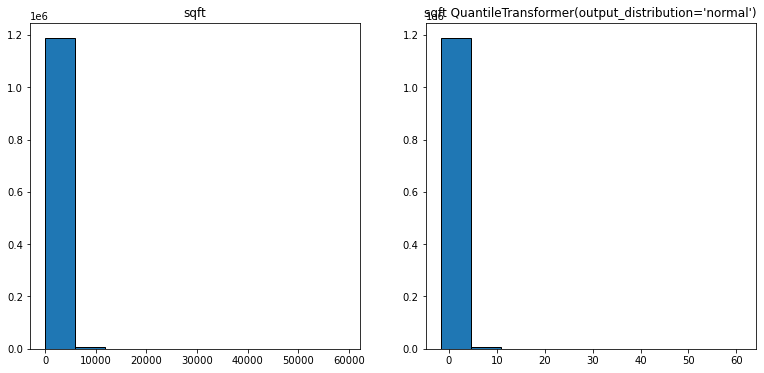

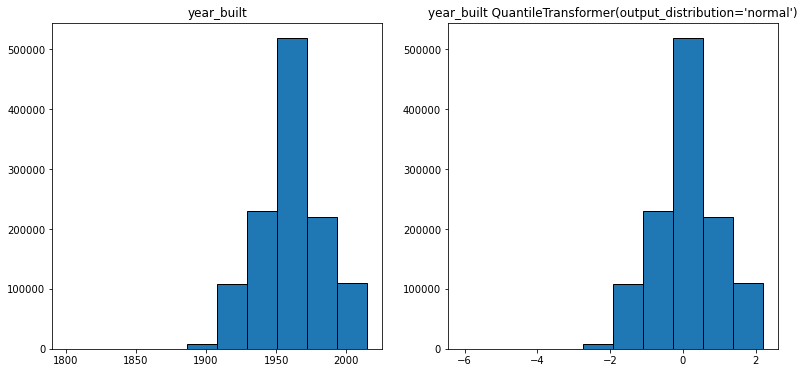

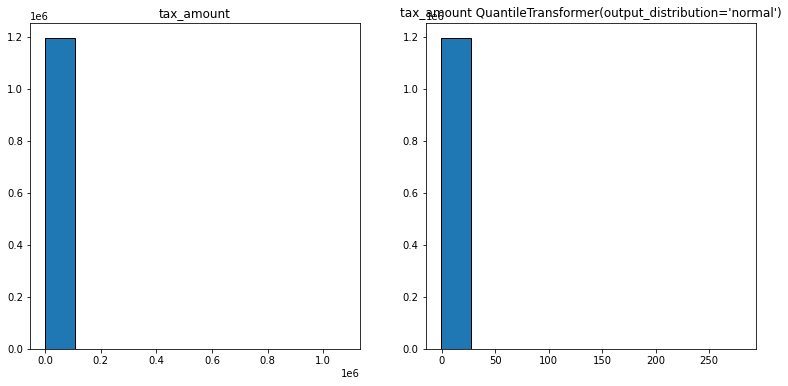

In [8]:
scaler = QuantileTransformer(output_distribution='normal')

for feature in quant_features:
    
    scaler.fit(x_train[[feature]])
    
    x_train_scaled[feature] == scaler.transform(x_train[[feature]]).flatten()
    x_validate_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
    x_test_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
    
    plt.figure(figsize=(13, 6))

    plt.subplot(121)
    plt.hist(x_train[feature], ec='black')
    plt.title(feature)

    plt.subplot(122)
    plt.hist(x_train_scaled[feature], ec='black')
    plt.title(f'{feature} {scaler}')

    plt.show()

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. 

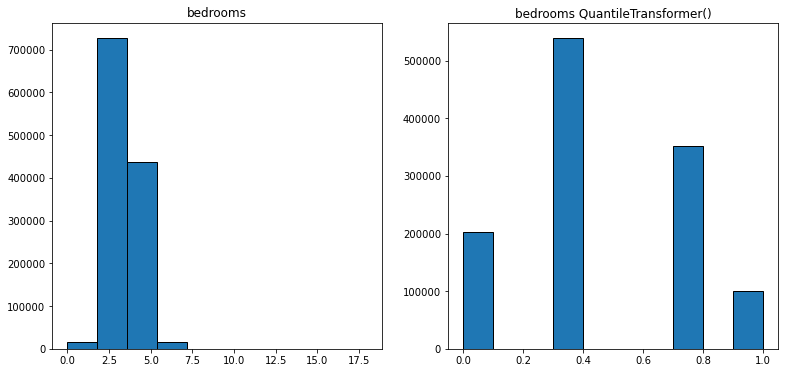

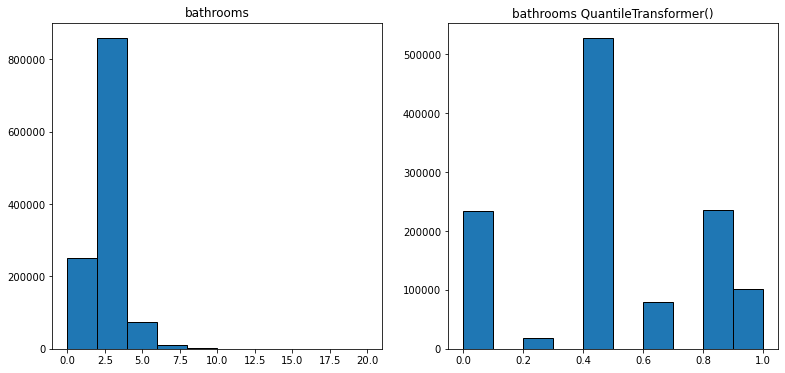

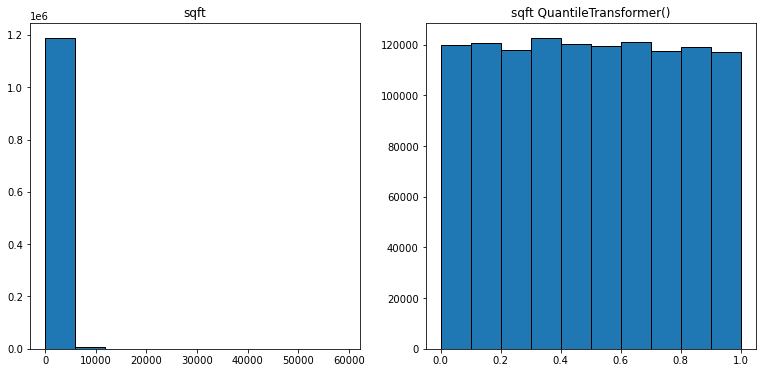

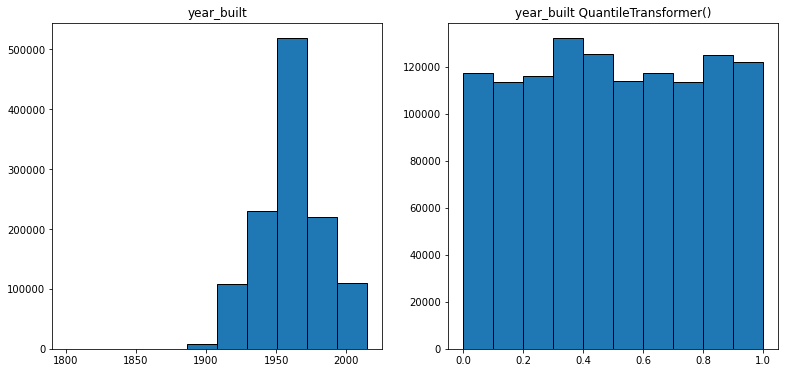

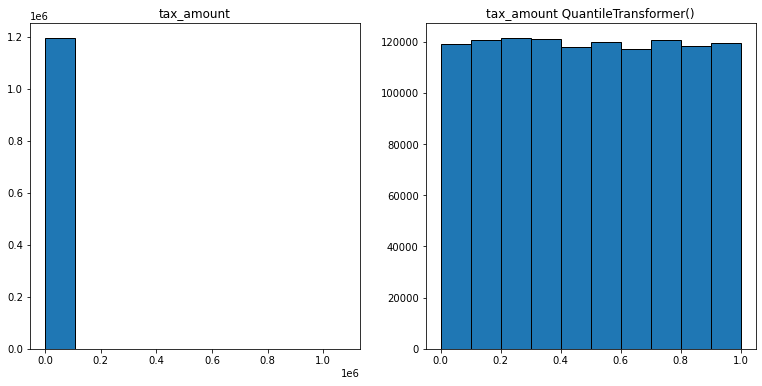

In [9]:
scaler = QuantileTransformer()

for feature in quant_features:
    
    scaler.fit(x_train[[feature]])
    
    x_train_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
    x_validate_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
    x_test_scaled[feature] = scaler.transform(x_train[[feature]]).flatten()
    
    plt.figure(figsize=(13, 6))

    plt.subplot(121)
    plt.hist(x_train[feature], ec='black')
    plt.title(feature)

    plt.subplot(122)
    plt.hist(x_train_scaled[feature], ec='black')
    plt.title(f'{feature} {scaler}')

    plt.show()

#### What do you notice?

Now, since the default argument for output_distribution is 'uniform', the scaled results are a much closer approximation of a uniform distribution, rather than a normal one. 

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [10]:
def scale_zillow(train, validate, test, scaler_type=MinMaxScaler()):    
    features_to_scale = ['bedrooms', 'bathrooms', 'sqft', 'year_built', 'tax_amount']
    other_features = ['fips']
    target = 'tax_value'

    # establish empty dataframes for storing scaled dataset
    train_scaled = pd.DataFrame(index=train.index)
    validate_scaled = pd.DataFrame(index=validate.index)
    test_scaled = pd.DataFrame(index=test.index)

    # screate and fit the scaler
    scaler = scaler_type.fit(train[features_to_scale])

    # adding scaled features to scaled dataframes
    train_scaled[features_to_scale] = scaler.transform(train[features_to_scale])
    validate_scaled[features_to_scale] = scaler.transform(validate[features_to_scale])
    test_scaled[features_to_scale] = scaler.transform(test[features_to_scale])

    # adding other features (no scaling) to scaled dataframes
    train_scaled[other_features] = train[other_features]
    validate_scaled[other_features] = validate[other_features]
    test_scaled[other_features] = test[other_features]

    # adding target variable (no scaling) to scaled dataframes
    train_scaled[target] = train[target]
    validate_scaled[target] = validate[target]
    test_scaled[target] = test[target]
    
    return train_scaled, validate_scaled, test_scaled